### 1. Installed the necessary libraries from requirements.txt file .

In [6]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import os
import matplotlib.pyplot as plt
import scipy
import re

### 2. Imported the country relationships file.

In [9]:


# Define the file path
file_path = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\relationships.csv'

# Import the file as a dataframe
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


  Entity 1 Entity 2
0   France  Austria
1   France  Hungary
2  Austria  Hungary
3  Germany   Russia
4  Germany    Italy


In [11]:
print(df.columns)


Index(['Entity 1', 'Entity 2'], dtype='object')


### 3. Created a network object from the countries relationships dataframe.

In [14]:
G = nx.from_pandas_edgelist(df, source='Entity 1', target='Entity 2')


In [16]:
df.columns = df.columns.str.strip()


In [18]:
df.rename(columns={'Entity 1': 'Source', 'Entity 2': 'Target'}, inplace=True)


In [20]:
print(df.dtypes)


Source    object
Target    object
dtype: object


In [32]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

# Print basic graph information
print("Graph information:")
print(str(G))

Graph information:
Graph with 50 nodes and 105 edges


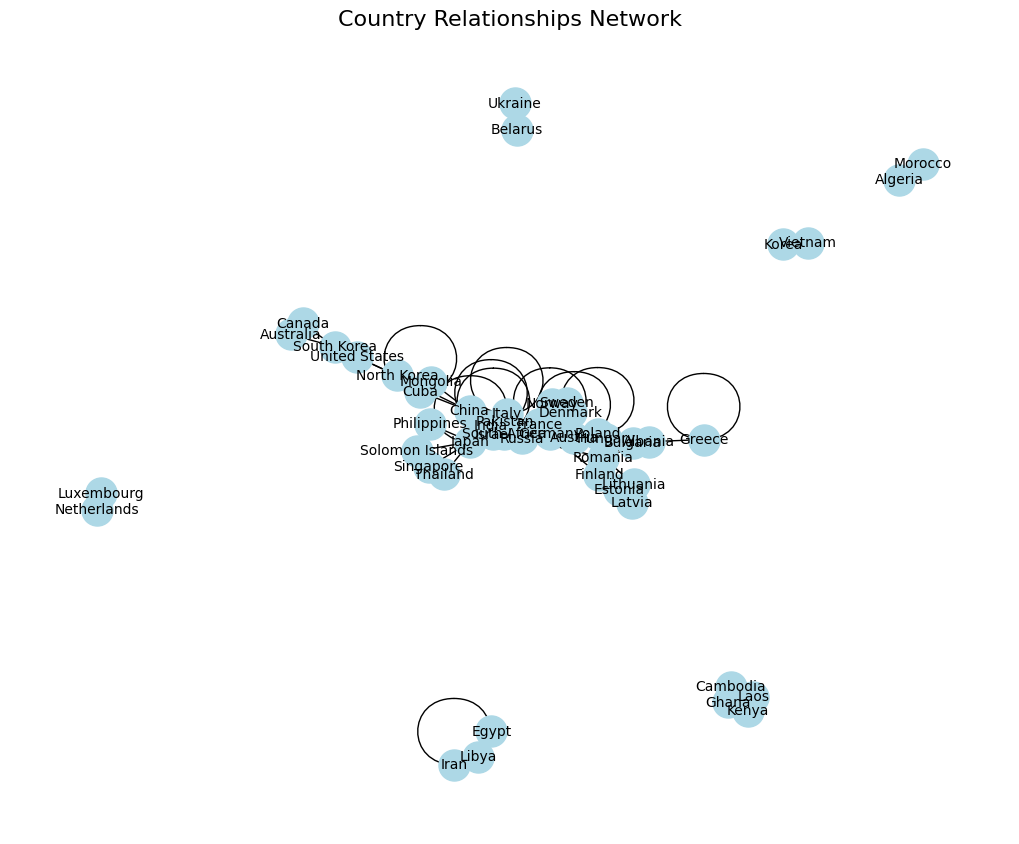

In [38]:


# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black")
plt.title("Country Relationships Network", fontsize=16)
plt.show()


### 4. Created a static network graph using only NetworkX. 

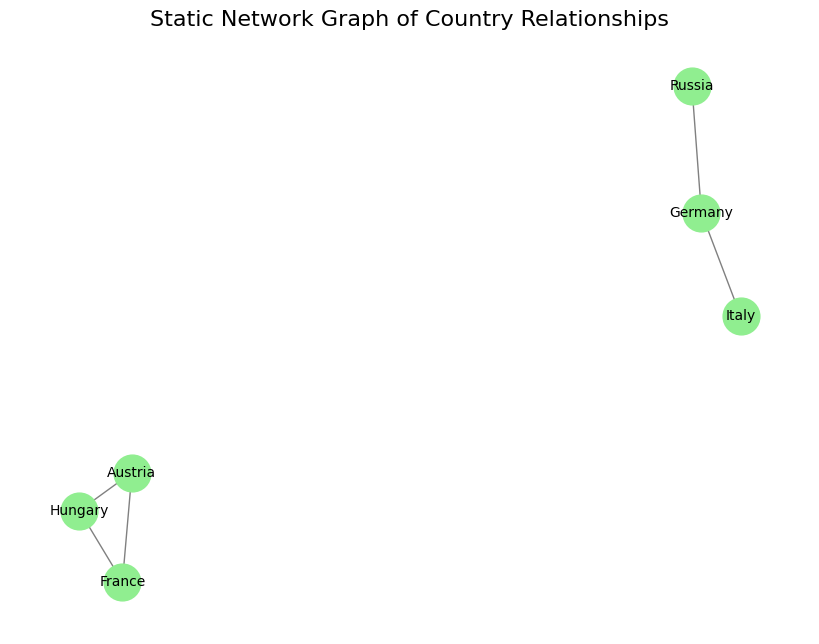

In [13]:


# Step 1: Define the Data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Step 2: Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# Step 3: Visualize the Static Network Graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    with_labels=True,
    node_size=700,
    node_color="lightgreen",
    font_size=10,
    font_color="black",
    edge_color="gray"
)
plt.title("Static Network Graph of Country Relationships", fontsize=16)
plt.show()


### 5. Switched to pyvis, build an interactive network graph .

In [86]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Define the data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# Create the Pyvis Network Object
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Check Pyvis Network object
print("Nodes in Pyvis Network:", net.nodes)
print("Edges in Pyvis Network:", net.edges)

# Save the interactive graph as an HTML file (alternative approach)
output_file = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\interactive_network_graph.html'

# Try using write_html() as an alternative
try:
    net.write_html(output_file)
    print(f"Interactive network graph saved as {output_file}")
except Exception as e:
    print(f"Error saving the graph: {e}")


Nodes in Pyvis Network: [{'color': '#97c2fc', 'size': 10, 'id': 'France', 'label': 'France', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'size': 10, 'id': 'Austria', 'label': 'Austria', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'size': 10, 'id': 'Hungary', 'label': 'Hungary', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'size': 10, 'id': 'Germany', 'label': 'Germany', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'size': 10, 'id': 'Russia', 'label': 'Russia', 'shape': 'dot', 'font': {'color': 'white'}}, {'color': '#97c2fc', 'size': 10, 'id': 'Italy', 'label': 'Italy', 'shape': 'dot', 'font': {'color': 'white'}}]
Edges in Pyvis Network: [{'width': 1, 'from': 'France', 'to': 'Austria'}, {'width': 1, 'from': 'France', 'to': 'Hungary'}, {'width': 1, 'from': 'Austria', 'to': 'Hungary'}, {'width': 1, 'from': 'Germany', 'to': 'Russia'}, {'width': 1, 'from': 'Germany', 'to': 'Italy'}]
Interactive network gra

### 6. The Leiden algorithm to detect any communities within the countries. 

In [33]:
# import pandas as pd
import networkx as nx
from pyvis.network import Network
import leidenalg
import igraph as ig

# Define the data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# Convert the NetworkX graph to an iGraph object, which is needed for leidenalg
G_ig = ig.Graph.from_networkx(G)

# Apply the Leiden algorithm to detect communities
partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)

# Get the community assignments for each node
community_dict = {}
for idx, community in enumerate(partition):
    for vertex in community:
        node_name = G_ig.vs[vertex]["_nx_name"]  # Correctly access the _nx_name attribute
        community_dict[node_name] = idx

# Print the community assignments
print("Community Assignments:")
for country, community_id in community_dict.items():
    print(f"{country}: Community {community_id}")

# Create the Pyvis Network Object for visualization
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Set node colors based on communities
for node in net.nodes:
    node_id = node['id']
    if node_id in community_dict:
        community_id = community_dict[node_id]
        node['color'] = f"rgb({(community_id * 50) % 255}, 100, 150)"

# Save the interactive graph with community colors as an HTML file
output_file = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.6\interactive_network_graph_with_communities1.html'
net.write_html(output_file)

print(f"Interactive network graph with communities saved as {output_file}")


Community Assignments:
France: Community 0
Austria: Community 0
Hungary: Community 0
Germany: Community 1
Russia: Community 1
Italy: Community 1
Interactive network graph with communities saved as P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.6\interactive_network_graph_with_communities1.html


### 7.Visualized the output of the communities algorithm on a new network graph.

In [88]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import leidenalg
import igraph as ig

# Define the data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# Convert the NetworkX graph to an iGraph object, which is needed for leidenalg
G_ig = ig.Graph.from_networkx(G)

# Apply the Leiden algorithm to detect communities
partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)

# Get the community assignments for each node
community_dict = {}
for idx, community in enumerate(partition):
    for vertex in community:
        node_name = list(G.nodes())[vertex]  # Get the node name from the list of nodes
        community_dict[node_name] = idx

# Create the Pyvis Network Object for visualization
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Set node colors based on communities
for node in net.nodes:
    community_id = community_dict[node['id']]
    node['color'] = f"rgb({(community_id * 50) % 255}, 100, 150)"

# Define the file path where you want to save the graph
output_file = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\interactive_network_graph2.html'

# Save the graph using write_html() as an alternative to show()
try:
    net.write_html(output_file)
    print(f"Interactive network graph saved as {output_file}")
except Exception as e:
    print(f"Error saving the graph: {e}")


Interactive network graph saved as P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\interactive_network_graph2.html



  ### Community Detection and Historical Context:

    Community Partition: The Leiden algorithm divides countries into groups that are more strongly connected internally than externally. The communities detected likely represent clusters of countries with historical, geopolitical, or economic ties.

    Possible Communities:
        Community 0: Could represent countries that share strong historical ties in Europe, such as Austria and France. They might have had similar political alliances or were part of the same empires in history.
        Community 1: Countries like Hungary and Germany are likely clustered here due to shared history in terms of alliances and conflicts.

    Historical Context:
        Historical Alliances: Countries like France, Austria, and Hungary have shared complex historical relationships, including alliances and conflicts throughout European history (e.g., World War I and World War II).
        Geopolitical Significance: Russia’s connection to Germany could be related to the strategic partnerships and historical conflicts between them (e.g., the Cold War, WWII).
        Regional Grouping: Geographically close countries with historical ties, such as Austria and Hungary, are likely grouped together in the same community.

Possible Conclusions:

    Geopolitical Grouping: The algorithm seems to detect clusters that align well with Europe’s political and historical groupings. The communities might represent groups of countries that share cultural, economic, or political similarities.

    Potential Future Analysis:
        Economic Relationships: Further analysis could show whether countries within the same community have economic ties, like trade agreements or economic pacts.
        Social and Cultural Connections: Beyond history, you might also explore social and cultural networks, such as shared languages or educational exchanges, which could influence community structure.



The Leiden algorithm's community partitioning makes sense when considering historical alliances, conflicts, and geographical proximity. This model offers a starting point for deeper investigations into the historical connections between countries based on the graph structure.


### 8. Calculated and visualized the degree, closeness, and betweenness centrality measures .

In [91]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import leidenalg
import igraph as ig

# Define the data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print out the centrality measures
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

# Visualize the graph with Pyvis and highlight nodes based on centrality measures

# Create the Pyvis Network Object for visualization
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Set node colors based on Degree Centrality (larger degree means more central)
for node in net.nodes:
    node_id = node['id']
    degree_value = degree_centrality[node_id]
    closeness_value = closeness_centrality[node_id]
    betweenness_value = betweenness_centrality[node_id]
    
    # Normalize the values for better visualization (scale them)
    node['size'] = 20 + degree_value * 50  # Larger size for higher degree centrality
    node['color'] = f"rgb({int(degree_value * 255)}, 100, 150)"  # Color based on degree centrality
    
    # Set node labels to display centrality measures
    node['label'] = f"Degree: {degree_value:.2f}\nCloseness: {closeness_value:.2f}\nBetweenness: {betweenness_value:.2f}"

# Define the file path where you want to save the graph
output_file = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\interactive_network_graph_with_centrality.html'

# Save the graph using write_html()
try:
    net.write_html(output_file)
    print(f"Interactive network graph with centrality saved as {output_file}")
except Exception as e:
    print(f"Error saving the graph: {e}")


Degree Centrality: {'France': 0.4, 'Austria': 0.4, 'Hungary': 0.4, 'Germany': 0.4, 'Russia': 0.2, 'Italy': 0.2}
Closeness Centrality: {'France': 0.4, 'Austria': 0.4, 'Hungary': 0.4, 'Germany': 0.4, 'Russia': 0.26666666666666666, 'Italy': 0.26666666666666666}
Betweenness Centrality: {'France': 0.0, 'Austria': 0.0, 'Hungary': 0.0, 'Germany': 0.1, 'Russia': 0.0, 'Italy': 0.0}
Interactive network graph with centrality saved as P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\interactive_network_graph_with_centrality.html


In [97]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Define the data
data = {
    "Entity 1": ["France", "France", "Austria", "Germany", "Germany"],
    "Entity 2": ["Austria", "Hungary", "Hungary", "Russia", "Italy"]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Create the NetworkX Graph
G = nx.from_pandas_edgelist(df, source="Entity 1", target="Entity 2")

# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# 3. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print out the centrality measures
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

# Create the Pyvis Network Object for visualization
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Set node colors and labels based on centrality measures
for node in net.nodes:
    node_id = node['id']
    
    # Find the corresponding country name using the entity names in the DataFrame
    # We map each node_id (which corresponds to 'Entity 1' or 'Entity 2') to the actual country names
    if node_id in df["Entity 1"].values:
        country_name = df[df["Entity 1"] == node_id]["Entity 1"].values[0]
    else:
        country_name = df[df["Entity 2"] == node_id]["Entity 2"].values[0]
    
    degree_value = degree_centrality[node_id]
    closeness_value = closeness_centrality[node_id]
    betweenness_value = betweenness_centrality[node_id]
    
    # Normalize the values for better visualization (scale them)
    node['size'] = 20 + degree_value * 50  # Larger size for higher degree centrality
    node['color'] = f"rgb({int(degree_value * 255)}, 100, 150)"  # Color based on degree centrality
    
    # Set node labels to display country names and centrality measures
    node['label'] = f"{country_name}\nDegree: {degree_value:.2f}\nCloseness: {closeness_value:.2f}\nBetweenness: {betweenness_value:.2f}"

# Define the file path where you want to save the graph
output_file = r'P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\2.interactive_network_graph_with_centrality_and_names.html'

# Save the graph using write_html()
try:
    net.write_html(output_file)
    print(f"Interactive network graph with centrality and country names saved as {output_file}")
except Exception as e:
    print(f"Error saving the graph: {e}")


Degree Centrality: {'France': 0.4, 'Austria': 0.4, 'Hungary': 0.4, 'Germany': 0.4, 'Russia': 0.2, 'Italy': 0.2}
Closeness Centrality: {'France': 0.4, 'Austria': 0.4, 'Hungary': 0.4, 'Germany': 0.4, 'Russia': 0.26666666666666666, 'Italy': 0.26666666666666666}
Betweenness Centrality: {'France': 0.0, 'Austria': 0.0, 'Hungary': 0.0, 'Germany': 0.1, 'Russia': 0.0, 'Italy': 0.0}
Interactive network graph with centrality and country names saved as P:\CarrerFoundy\Data Visualizations with Python\Exercise 1.7\2.interactive_network_graph_with_centrality_and_names.html


### Observations :

    Degree Centrality:
        Nodes with a higher degree will have a larger size and a more prominent position in the graph.
        These nodes are more "central" in the network, meaning they are directly connected to more nodes.

    Closeness Centrality:
        Nodes with higher closeness centrality can access the rest of the network faster. These nodes will likely have a medium size and are strategically placed.

    Betweenness Centrality:
        Nodes with high betweenness centrality act as bridges between different parts of the network. These nodes will have a noticeable size and might be located in the center of the graph.

By visualizing these centrality measures, you can better understand how important each node is in the network from different perspectives (connections, accessibility, and bridging roles).